In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import *

df=pd.read_csv('https://github.com/Shreyas3108/house-price-prediction/blob/master/kc_house_data.csv?raw=true')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [3]:
df['date']=[1 if values==2014 else 0 for values in df.date]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,0,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,0,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,0,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,0,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,0,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.dtypes

id                 int64
date               int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [7]:
df['bathrooms'].unique()

array([ 1.  ,  2.25,  3.  ,  2.  ,  4.5 ,  1.5 ,  2.5 ,  1.75,  2.75,
        3.25,  4.  ,  3.5 ,  0.75,  4.75,  5.  ,  4.25,  3.75,  0.  ,
        1.25,  5.25,  6.  ,  0.5 ,  5.5 ,  6.75,  5.75,  8.  ,  7.5 ,
        7.75,  6.25,  6.5 ])

In [8]:
corr=df.corr()

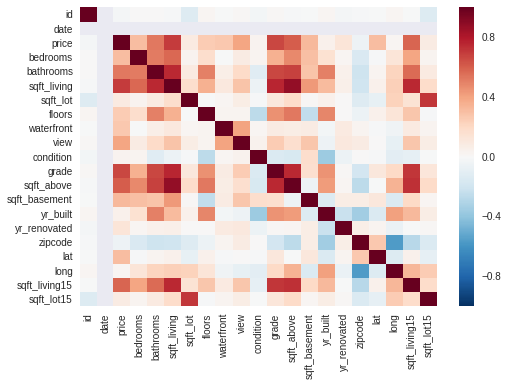

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(corr)
plt.show()

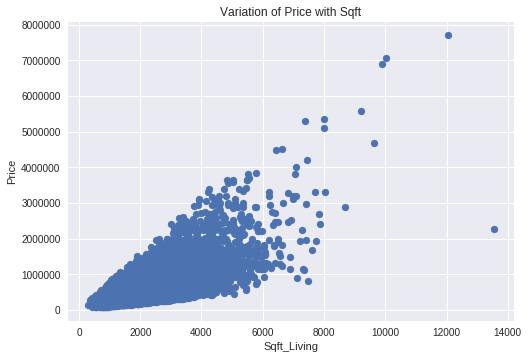

In [36]:
plt.scatter(df.sqft_living, df.price)
plt.xlabel('Sqft_Living')
plt.ylabel('Price')
plt.title('Variation of Price with Sqft')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.2)
print(train.shape)
print(test.shape)

(17290, 21)
(4323, 21)


In [17]:
X_train=train[['id', 'date', 'bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15']]   
y_train=train['price']
X_test=test[['id', 'date', 'bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15']]   
y_test=test['price']
X_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
6302,1736800920,0,3,1.75,1320,7840,1.0,0,0,3,8,1320,0,1966,0,98007,47.6024,-122.143,2050
2177,3317500030,0,3,2.50,3630,11019,1.0,0,0,4,9,2150,1480,1972,0,98040,47.5610,-122.226,3150
19040,2968801605,0,4,1.75,1440,6720,1.0,0,0,5,6,720,720,1954,0,98166,47.4571,-122.345,1820
2537,2558650200,0,3,2.25,2280,8500,1.0,0,0,4,7,1680,600,1977,0,98034,47.7211,-122.166,1890
20685,6358900070,0,4,3.25,4140,46173,2.0,0,0,3,9,4140,0,2007,0,98011,47.7647,-122.213,2060


In [18]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train).score(X_train, y_train)

0.70104987767734095

In [22]:
y_pred=model.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.691946048753


In [24]:
from sklearn.ensemble import RandomForestRegressor
lr=RandomForestRegressor()
lr.fit(X_train, y_train).score(X_train, y_train)

0.97396675186296711

In [33]:
y_pred1=lr.predict(X_test)
print(r2_score(y_pred1, y_test))

0.8485061879


ValueError: Can't handle mix of multiclass and continuous